In [47]:
import pandas as pd
carsales = pd.read_csv('data/carsales.csv')
print(carsales.head())

     Month  Monthly car sales in Quebec 1960-1968
0  1960-01                                 6550.0
1  1960-02                                 8728.0
2  1960-03                                12026.0
3  1960-04                                14395.0
4  1960-05                                14587.0


In [48]:
carsales.columns = ["month", "sales"]
print(carsales.tail())

                                     month    sales
104                                1968-09  14385.0
105                                1968-10  21342.0
106                                1968-11  17180.0
107                                1968-12  14577.0
108  Monthly car sales in Quebec 1960-1968      NaN


In [49]:
carsales=carsales.loc[0:107,:].copy()
carsales["period"] = list(range(108))

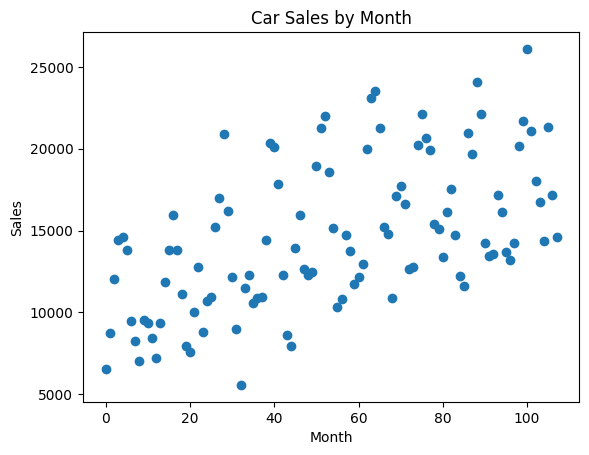

In [50]:
from matplotlib import pyplot as plt
plt.scatter(carsales["period"], carsales["sales"])
plt.title("Car Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [51]:
x = carsales["period"].values.reshape(-1, 1)
y = carsales["sales"].values.reshape(-1, 1)

In [52]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
print(regressor.coef_)
print(regressor.intercept_)

[[81.20250174]]
[10250.77726809]


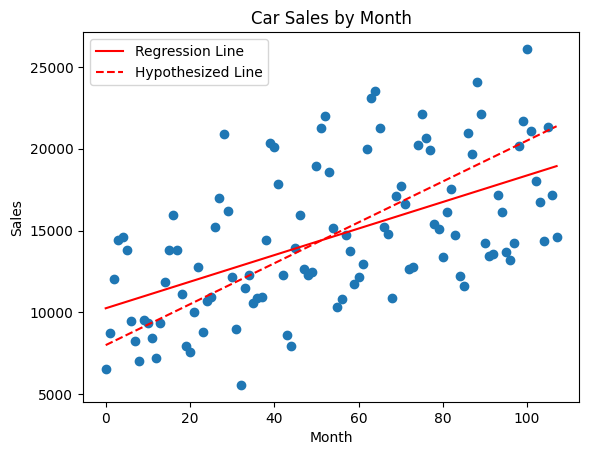

In [54]:
plt.scatter(carsales["period"], carsales["sales"])
plt.plot(carsales["period"], [81.2 * i + 10250.8 for i in carsales["period"]], "r-", label="Regression Line")
plt.plot(carsales["period"], [125 * i + 8000 for i in carsales["period"]], "r--", label="Hypothesized Line")
plt.legend(loc="upper left")
plt.title("Car Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [55]:
sales_list = carsales['sales'].tolist()
regression_line = [81.2 * i + 10250.8 for i in carsales["period"]]
hypothesized_line = [125 * i + 8000 for i in carsales["period"]]
error1 = [(x-y) for x, y in zip(regression_line, sales_list)]
error2 = [(x-y) for x, y in zip(hypothesized_line, sales_list)]
print(error1)
print(error2)

[3700.7999999999993, 1604.0, -1612.800000000001, -3900.6000000000004, -4011.4000000000015, -3134.2000000000007, 1240.0, 2568.199999999999, 3851.3999999999996, 1436.5999999999985, 1698.7999999999993, 2688.0, 3988.199999999999, 1932.3999999999996, -449.40000000000146, -2315.2000000000007, -4376.0, -2189.800000000001, 569.3999999999996, 3818.5999999999985, 4264.799999999999, 1941.0, -721.8000000000011, 3302.3999999999996, 1522.5999999999985, 1333.7999999999993, -2838.0, -4566.800000000001, -8375.6, -3599.4000000000015, 543.7999999999993, 3771.0, 7281.199999999999, 1456.3999999999996, 755.5999999999985, 2509.7999999999993, 2312.0, 2290.199999999999, -1068.6000000000004, -6961.4000000000015, -6629.200000000001, -4236.0, 1393.199999999999, 5100.4, 5861.5999999999985, -27.200000000000728, -1950.0, 1439.199999999999, 1881.3999999999996, 1759.5999999999985, -4633.200000000001, -6867.0, -7541.799999999999, -4026.6000000000004, -539.4000000000015, 4410.799999999999, 4006.0, 127.20000000000073, 12

In [56]:
import numpy as np

error1abs = [abs(value) for value in error1]
error2abs = [abs(value) for value in error2]
print(np.mean(error1abs))
print(np.mean(error2abs))

3154.3592592592595
3239.777777777778


In [57]:
error1squared = [value ** 2 for value in error1]
error2squared = [value ** 2 for value in error2]

print(np.sqrt(np.mean(error1squared)))
print(np.sqrt(np.mean(error2squared)))

3725.491219512759
3968.900519455399


In [58]:
def get_mae(line, actual):
    error = [(x-y) for x, y in zip(line, actual)]
    errorabs = [abs(value) for value in error]
    mae = np.mean(errorabs)
    return mae

def get_rmse(line, actual):
    error = [(x-y) for x, y in zip(line, actual)]
    errorabs = [abs(value)**2 for value in error]
    rsme = np.sqrt(np.mean(errorabs))
    return rsme

In [59]:
x_extended = np.append(carsales["period"], np.arange(108, 116))
x_extended = x_extended.reshape(-1, 1)
extended_prediction = regressor.predict(x_extended)

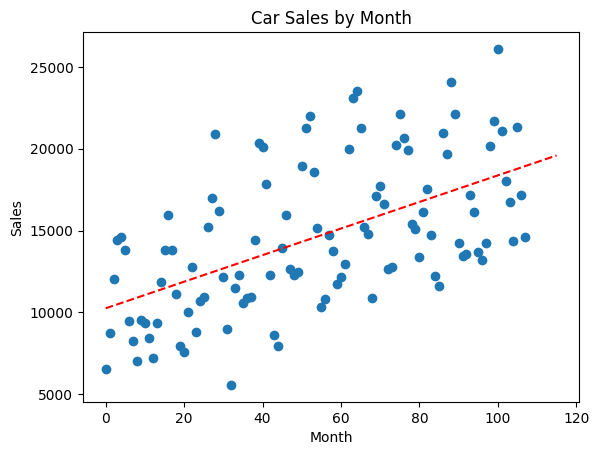

In [60]:
plt.scatter(carsales["period"], carsales["sales"])
plt.plot(x_extended, extended_prediction, "r--")
plt.title("Car Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

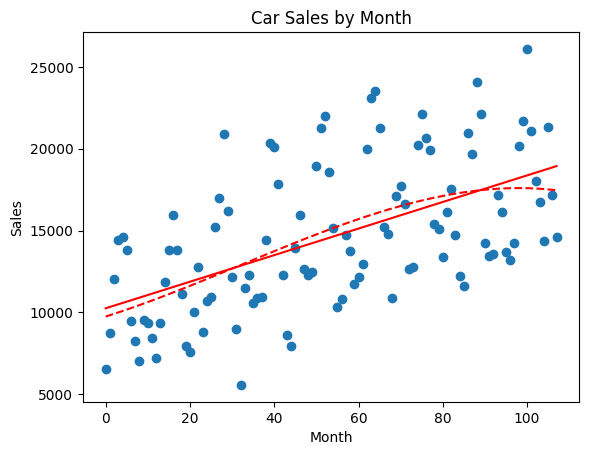

In [61]:
carsales["quadratic"] = carsales["period"].apply(lambda x: x**2)
carsales["cubic"] = carsales["period"].apply(lambda x: x**3)

x3 = carsales.loc[:, ["period", "quadratic", "cubic"]].values.reshape(-1, 3)
y = carsales["sales"].values.reshape(-1, 1)

regressor_cubic = LinearRegression()
regressor_cubic.fit(x3, y)
plt.scatter(carsales["period"], carsales["sales"])
plt.plot(x, regressor.predict(x), "r-")
plt.plot(x, regressor_cubic.predict(x3), "r--")
plt.title("Car Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [62]:
print(regressor_cubic.coef_)
print(regressor_cubic.intercept_)

[[ 8.13410634e+01  7.90279561e-01 -8.19451188e-03]]
[9746.41276055]


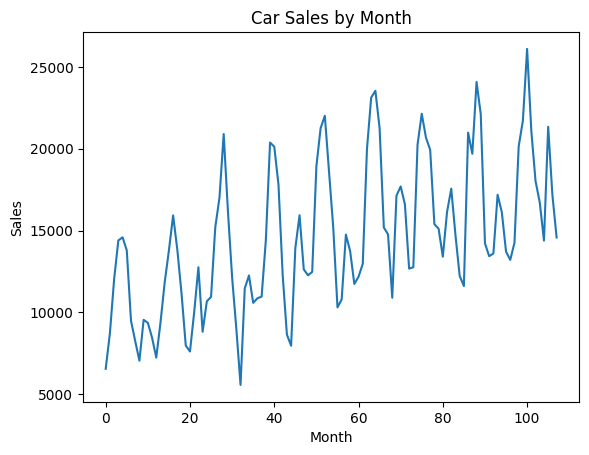

In [63]:
plt.plot(carsales["period"], carsales["sales"])
plt.title("Car Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

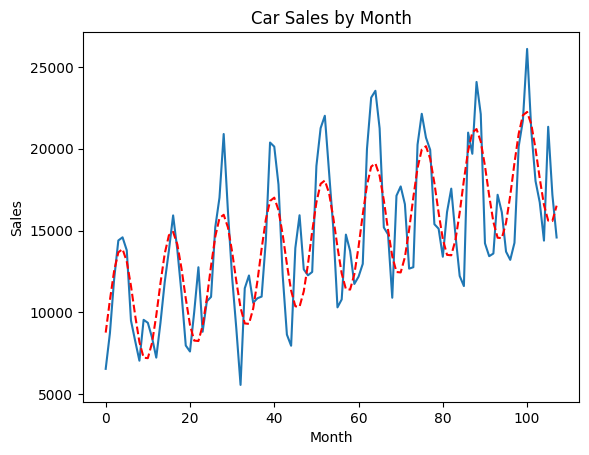

In [64]:
import math
carsales["sin_period"] = carsales['period'].apply(lambda x: math.sin(x*2*math.pi/12))
carsales["cos_period"] = carsales['period'].apply(lambda x: math.cos(x*2*math.pi/12))

x_trig = carsales.loc[:, ["period", "sin_period", "cos_period"]].values.reshape(-1, 3)
y = carsales["sales"].values.reshape(-1, 1)

regressor_trig = LinearRegression()
regressor_trig.fit(x_trig, y)

plt.plot(carsales['period'],carsales['sales'])
plt.plot(x,regressor_trig.predict(x_trig),'r--')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [65]:
trig_line = regressor_trig.predict(x_trig)[:, 0]
print(get_rmse(trig_line, sales_list))

2680.5520744410464


In [66]:
carsales['squareroot']=carsales['period'].apply(lambda x: x**0.5)
carsales['exponent15']=carsales['period'].apply(lambda x: x**1.5)
carsales['log']=carsales['period'].apply(lambda x: math.log(x+1))

x_complex = carsales.loc[:,['period','log','sin_period','cos_period', 'squareroot','exponent15','log','quadratic', 'cubic']].values.reshape(-1,9)
y = carsales['sales'].values.reshape(-1,1)

regressor_complex = LinearRegression()
regressor_complex.fit(x_complex,y)

complex_line=[prediction for sublist in regressor_complex.predict(x_complex) for prediction in sublist]
print(get_rmse(complex_line, sales_list))

2610.393812297885


In [67]:
x_complex_train = carsales.loc[0:80, ['period','log','sin_period','cos_period', 'squareroot','exponent15','log','quadratic', 'cubic']].values.reshape(-1,9)
y_train = carsales.loc[0:80,'sales'].values.reshape(-1,1)

x_complex_test = carsales.loc[81:107, ['period','log','sin_period','cos_period', 'squareroot','exponent15','log','quadratic', 'cubic']].values.reshape(-1,9)
y_test = carsales.loc[81:107,'sales'].values.reshape(-1,1)

regressor_complex.fit(x_complex_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [68]:
x_train = carsales.loc[0:80,['period']].values.reshape(-1,1)
x_test = carsales.loc[81:107,['period']].values.reshape(-1,1)
x_trig_train = carsales.loc[0:80,['period','sin_period','cos_period']].values.reshape(-1,3)
x_trig_test = carsales.loc[81:107,['period','sin_period','cos_period']].values.reshape(-1,3)

regressor.fit(x_train, y_train)
regressor_trig.fit(x_trig_train, y_train)

complex_test_predictions=[prediction for sublist in regressor_complex.predict(x_complex_test) for prediction in sublist]
test_predictions=[prediction for sublist in regressor.predict(x_test) for prediction in sublist]
trig_test_predictions=[prediction for sublist in regressor_trig.predict(x_trig_test) for prediction in sublist]

print(get_rmse(test_predictions,sales_list[81:107]))
print(get_rmse(trig_test_predictions,sales_list[81:107]))
print(get_rmse(complex_test_predictions,sales_list[81:107]))

4115.614379193304
3461.082329259936
6006.013164151165
